[scikit-learn で線形回帰 (単回帰分析・重回帰分析)](https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0)

In [56]:
# テストデータの読み込み
import pandas as pd
import numpy as np
 
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
# 単回帰分析
from sklearn import linear_model
model = linear_model.LinearRegression()

# 説明変数に "density (濃度)" を利用
X = wine.loc[:, ['density']].values
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol'].values

# 予測モデルを作成
model.fit(X, Y)
print('モデルのパラメータ:', model.get_params())
print('回帰係数:', model.coef_)
print('切片 (誤差):', model.intercept_)
print('決定係数(X,Yの相関):', model.score(X, Y))
print('回帰式：[alcohol] = %s × [density] + %s' % (model.coef_[0], model.intercept_))

モデルのパラメータ: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
回帰係数: [-280.16382307]
切片 (誤差): 289.67534338256456
決定係数(X,Yの相関): 0.2461943643971065
回帰式：[alcohol] = -280.16382306826216 × [density] + 289.67534338256456


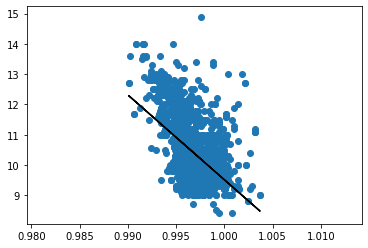

In [42]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X), color='black')

In [52]:
# 重回帰分析
from sklearn import linear_model
model = linear_model.LinearRegression()

# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality'].values

# 予測モデルを作成
model.fit(X, Y)

# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients') )
 
print('切片(誤差):', model.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
切片(誤差): 21.96520844945212


In [58]:
# 重回帰分析(正規化)
from sklearn import linear_model
model = linear_model.LinearRegression()

# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [59]:
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.values 
# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality'].values
 
# 予測モデルを作成
model.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(model.coef_)}).sort_values(by='Coefficients') )
 
print('切片(誤差):', model.intercept_)

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
切片(誤差): 1.9140742913275613e-16
